<a href="https://colab.research.google.com/github/Ladouce07/Data-Science/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 “Prediction with neural networks (NN)” (20 scores)**

1) Complete all preparation steps as in previous assignments to clean, scale and prepare the
dataset for the analysis. Use the best scaler from your previous assignments.

In [ ]:
# Read of Data
import pandas as pd

df=pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
# Divide Dataset into two Matrices X, Y
Y = df['Weight']
X = df.drop(['Weight'],axis=1)

print(X.shape);
print(Y.shape);

(159, 6)
(159,)


Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.

In [ ]:
from pandas.core.arrays import categorical
from sklearn.preprocessing import LabelEncoder
categorical = ['Species']
le = LabelEncoder()
for i in categorical:
  le.fit(df[i])
  df[i]=le.transform(df[i])

In [ ]:
# Scale the data with Standard Scaler
X = df.drop(['Weight'],axis=1)
from sklearn.preprocessing import StandardScaler
sc_standard = StandardScaler().fit(X)
XS_scaler = sc_standard.transform(X)#

Divide your dataset into 2 parts: training set and testing set (80:20). Use defined random_state to reproduce the splitting for other Scaler. Output the dimension of the resulting datasets.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XS_scaler, Y, test_size = 0.20, random_state=0)
X.shape

(159, 6)

2) Construct a fully connected NN network using “keras” library. The network should contain
1-2 hidden layers. Experiment with different number of neurons for each layer, try several
dropout layers between hidden layers, other parameters, find the optimal training time. Try
to achieve the performance near or better than the best one of your previous methods.
Present the performance results (predictions, R2, MSE, MAE) for the testset with 3 best
architectures as a table. Use repeated holdout cross-validation, generating 10 random
training sets and test sets with proportion according to your individual variant in
assignment 2.

In [ ]:
pip install scikeras

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.python.ops.gen_batch_ops import batch
from keras.optimizers import optimizer
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from functools import partial

dropout=[0.2, 0.3,0.4, 0.6]
neuronInput = [64, 128, 256,512]
neuronLayer = [64, 128, 256,512]

def create_model(i,j,x):
        network = keras.Sequential()
        network.add(keras.layers.Dense(i, activation='relu', input_shape=(X.shape[1],)))
    # Hidden layers
        network.add(keras.layers.Dropout(x))
        network.add(keras.layers.Dense(j, activation='relu'))
        network.add(keras.layers.Dense(1)) # Output layers
        return network

tab =[]
for iteration in range(10):
  X_train, X_test, Y_train, Y_test = train_test_split(XS_scaler,Y, test_size=0.2, random_state=iteration+1)
  for i in neuronInput:
    for j in neuronLayer:
      for x in dropout:
        model1 = KerasRegressor(model=create_model(i, j, x), epochs=20, optimizer='adam', loss='mean_absolute_error', batch_size=10)
        model1.fit(X_train, Y_train)

        predict_test = model1.predict(X_test)
        r2 = r2_score(predict_test, Y_test)
        mae = mean_absolute_error(Y_test, predict_test)
        mse = mean_squared_error(Y_test, predict_test)
        tab.append((i,j,x,mse,mae,r2))

tab.sort(key=lambda y:y[4])

best_architecture = tab[:3]


columnsDataFrame =['neuronInput', 'neuronLayer', 'droupout', 'MSE', 'MAE', 'R2']
data = pd.DataFrame(best_architecture, columns=columnsDataFrame)

print(data)




Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 392.4948
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 390.5962
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 388.4051
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 383.7307
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 378.9981
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 371.9202
Epoch 10/20
13/13 [==============================] - 0s 5ms/step - loss: 363.0353
Epoch 11/20
13/13 [==============================] - 0s 4ms/step - loss: 348.4157
Epoch 12/20
13/13 [==============================] - 0s 5ms/step - loss: 335.2025
Epoch 13/20
13/13 [==============================] - 0s 5ms/step - loss: 310.6593
Epoch 14/20
13/13 [==============================] - 0s 4ms/step - loss: 291.0857
Epoch 15/20
13/13 [==================

**Task 2 “Evaluate the feature importances of the best NN model” (20 scores)**

1) Use “Drop column Importance” to calculate the feature importances of the best NN model.
Average the results with 10 different random number generators. Output the results as a
table and as a bar plot.

In [ ]:
from sklearn.base import clone
import numpy as np
from sklearn.inspection import permutation_importance
def create_model(inp_s):
        network = keras.models.Sequential()
        network.add(keras.layers.Dense(512, activation='relu', input_shape=(inp_s,)))
    # Hidden layers
        network.add(keras.layers.Dense(256, activation='relu'))
        network.add(keras.layers.Dense(1)) # Output layers
        return network


#predict_test = model1.predict(x_test)

for iteration in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(XS_scaler,Y, test_size=0.2, random_state=iteration+1)

    model1 = KerasRegressor(model=create_model,inp_s=6, epochs=20, optimizer='adam', loss='mean_absolute_error', batch_size=10)
    model1.fit(X_train, Y_train)
    model_clone = clone(model1)
    model_clone.random_state=iteration+1
    model_clone.fit(X_train, Y_train)
    benchmark_score = model_clone.score(X_train, Y_train)
    z_train = pd.DataFrame(X_train)
    importances =[]

    for col in z_train.columns:
      model_clone = KerasRegressor(model=create_model, inp_s=5, epochs=20, optimizer='adam', loss='mean_absolute_error', batch_size=10)
      model_clone.random_state = iteration+1
      model_clone.fit(z_train.drop(col, axis=1), Y_train)
      drop_col_score=model_clone.score(z_train.drop(col, axis=1), Y_train)
      importances.append(drop_col_score-benchmark_score)

average_drop_columns = np.mean(importances, axis=0)
importances_df= pd.DataFrame({'Feature': X.columns, 'Importance': average_drop_columns})


Epoch 1/20
13/13 [==============================] - 1s 4ms/step - loss: 407.3680
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 401.0500
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 389.4472
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 367.2213
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 323.3627
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 250.8385
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 147.5365
Epoch 8/20
13/13 [==============================] - 0s 4ms/step - loss: 91.0473
Epoch 9/20
13/13 [==============================] - 0s 4ms/step - loss: 81.7827
Epoch 10/20
13/13 [==============================] - 0s 3ms/step - loss: 74.1765
Epoch 11/20
13/13 [==============================] - 0s 3ms/step - loss: 69.3819
Epoch 12/20
13/13 [==============================] - 0s 4ms/step - loss: 64.2962
Epoch 13/20
13/13 [===========

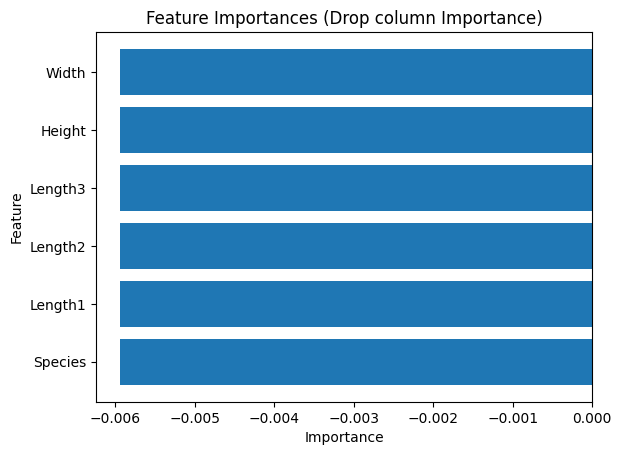

   Feature  Importance
0  Species   -0.005947
1  Length1   -0.005947
2  Length2   -0.005947
3  Length3   -0.005947
4   Height   -0.005947
5    Width   -0.005947


In [ ]:
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Drop column Importance)')
plt.show()
print(importances_df)


2) Use “Permutation Importance” method to calculate the feature importances of the NN
model. Use “from sklearn.inspection import permutation_importance”. Average
the results with 10 different splitting into training and testset. Use (n_repeats=10) as a
parameter of the permutation importance function. Present the results as a bar plot.

In [ ]:
tabPermutation =[]
tabPermutation1 =[]
for iteration in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(XS_scaler,Y, test_size=0.2, random_state=iteration+50)

    model1 = KerasRegressor(model=create_model,inp_s=6, epochs=20, optimizer='adam', loss='mean_absolute_error', batch_size=10)
    model1.fit(X_train, Y_train)
    perm_imp = permutation_importance(model1, X_train, Y_train, n_repeats=10)
    perm_imp1 = permutation_importance(model1, X_test, Y_test, n_repeats=10)
    tabPermutation.append(perm_imp.importances_mean)
    tabPermutation1.append(perm_imp1.importances_mean)



Epoch 1/20
13/13 [==============================] - 1s 6ms/step - loss: 417.5898
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 412.1741
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 401.4516
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 380.3617
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 341.6756
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 281.9498
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 188.2750
Epoch 8/20
13/13 [==============================] - 0s 6ms/step - loss: 93.9096
Epoch 9/20
13/13 [==============================] - 0s 4ms/step - loss: 77.8429
Epoch 10/20
13/13 [==============================] - 0s 4ms/step - loss: 71.8294
Epoch 11/20
13/13 [==============================] - 0s 4ms/step - loss: 67.7322
Epoch 12/20
13/13 [==============================] - 0s 4ms/step - loss: 63.2296
Epoch 13/20
13/13 [===========

In [ ]:
#Using Training set
average_permutation = np.mean(tabPermutation, axis=0)
importances_df= pd.DataFrame({'Feature': X.columns, 'Importance': average_permutation})

#using testing set
average_permutation1 = np.mean(tabPermutation1, axis=0)
importances_df1= pd.DataFrame({'Feature': X.columns, 'Importance': average_permutation1})


**Permutation importances output**

**Barplot output**

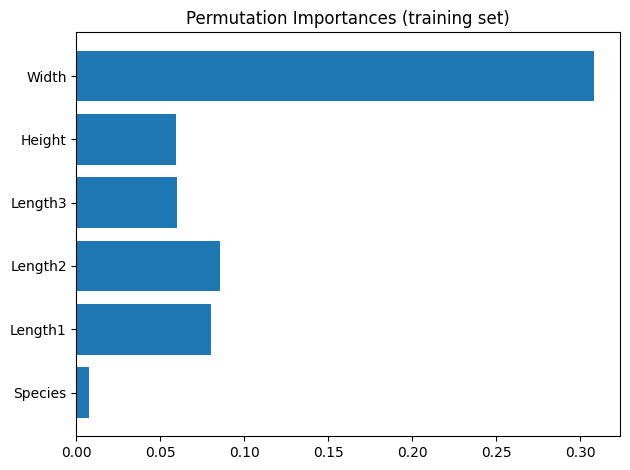

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(importances_df['Feature'], importances_df['Importance'].T)
ax.set_title("Permutation Importances (training set)")

"""ax.barh(importances_df1['Feature'], importances_df1['Importance'].T)
ax.set_title("Permutation Importances (testing set)")"""
fig.tight_layout()
plt.show()

3) Output the linear regression explainability results (assignment 1), which correspond to
model coefficients from assignment 1. Average the results with 10 different splitting into
training and testset.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()

# Perform cross-validation with 10 splits
n_splits = 10
coeff_results = []
for i in range(n_splits):
    X_train, X_test, Y_train, Y_test = train_test_split(XS_scaler, Y, test_size=0.2, random_state=i+10)
    lr.fit(X_train, Y_train)
    coeff = lr.coef_
    coeff_results.append(coeff)

# Average the coefficient results
average_coeff = np.mean(coeff_results, axis=0)

# Print the averaged coefficients
for feature, coefficient in zip(X.columns, average_coeff):
    print(f"Feature: {feature}, Average Coefficient: {coefficient}")

print("--------------------------------------------------------")
print("coefficient of linear regression")
for feature, coefficient in zip(X.columns, coeff_results):
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: Species, Average Coefficient: 53.910601050129365
Feature: Length1, Average Coefficient: 191.5286949946937
Feature: Length2, Average Coefficient: 585.0651911617317
Feature: Length3, Average Coefficient: -568.8483033639764
Feature: Height, Average Coefficient: 200.93387072655554
Feature: Width, Average Coefficient: 1.9327633699183617
--------------------------------------------------------
coefficient of linear regression
Feature: Species, Coefficient: [  56.61771141  152.92662715  718.92708518 -645.5540842   213.56991911
  -20.22177455]
Feature: Length1, Coefficient: [  53.2463449    73.9509885   730.56335332 -547.90233109  203.13663315
  -39.9894613 ]
Feature: Length2, Coefficient: [  51.33210503  313.01545945  364.96352767 -516.09718381  194.69924933
   36.44191542]
Feature: Length3, Coefficient: [ 6.30561838e+01 -2.44658900e+00  8.33500205e+02 -6.25833640e+02
  2.09451173e+02 -5.26444614e-01]
Feature: Height, Coefficient: [  52.16028848  497.13650328  268.17867517 -572.38486

4)Take one of the models from assignment 2 according to your individual variant (Random
Forest, **XGBoost**, CatBoost, LightGBM) and output its build-in feature importances: use
“model.feature_importances_”. Average the results with 10 different splitting into
training and testset.

In [ ]:
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()
n_splits = 10
coeff_results = []
for i in range(n_splits):
    X_train, X_test, Y_train, Y_test = train_test_split(XS_scaler, Y, test_size=0.2, random_state=i+10)
    xgr.fit(X_train, Y_train)
    coeff = xgr.feature_importances_
    coeff_results.append(coeff)

# Average the coefficient results
average_coeff = np.mean(coeff_results, axis=0)

# Print the averaged coefficients
for feature, coefficient in zip(X.columns, average_coeff):
    print(f"Feature: {feature}, Average Coefficient: {coefficient}")

print("--------------------------------------------------------")
print("coefficient of linear regression")
for feature, coefficient in zip(X.columns, coeff_results):
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: Species, Average Coefficient: 0.0007756398990750313
Feature: Length1, Average Coefficient: 0.03473426029086113
Feature: Length2, Average Coefficient: 0.1262514442205429
Feature: Length3, Average Coefficient: 0.3199682831764221
Feature: Height, Average Coefficient: 0.005913068074733019
Feature: Width, Average Coefficient: 0.5123572945594788
--------------------------------------------------------
coefficient of linear regression
Feature: Species, Coefficient: [0.00115275 0.0239456  0.28667226 0.3104467  0.00768405 0.37009862]
Feature: Length1, Coefficient: [4.5631969e-04 4.0172316e-02 7.2825854e-03 3.8245752e-01 7.0759230e-03
 5.6255531e-01]
Feature: Length2, Coefficient: [2.3708392e-04 1.5884265e-02 1.4021067e-01 2.1070834e-01 4.5700655e-03
 6.2838960e-01]
Feature: Length3, Coefficient: [2.6255430e-04 2.5595630e-02 2.2590813e-01 2.8886402e-01 4.1225222e-03
 4.5524713e-01]
Feature: Height, Coefficient: [0.00200767 0.0443115  0.05039739 0.27951792 0.00592874 0.6178368 ]
Feature:

5) Compare the results obtained on steps 1-4. Scale the explainability results (the sum of
importances shuld be equal with 1 within one model) of some methods if necessary and
present all the explainability results at one bar plot. Which variables are the most
important for the prediction. Are all the explainability results the same (inside one NN
model with different explainability methods, between different models)? Make
conclusions.

**Task 3: “Evaluate the feature importances of the NN model locally for several
predictions” (10 scores)**

1) Use “LIME” method to calculate the feature importances of the NN model locally for several
instances of the dataset. Select the instances to predict according to your individual variant.
Show the results as a bar plot. Use “lime.lime_tabular.LimeTabularExplainer in
mode=”regression””. Average the results with 10 different splitting into training and
testset. Compare with the results of the previous task.

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=71df2966f3d8ef70752f9e834b55f519a36d0af7d742a492b0139c0fad492ee4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Epoch 1/20
13/13 [==============================] - 1s 4ms/step - loss: 378.9408
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 376.5330
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 373.2524
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 367.9890
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 359.5665
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 345.6125
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 324.0995
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 293.8670
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 249.4573
Epoch 10/20
13/13 [==============================] - 0s 3ms/step - loss: 189.9125
Epoch 11/20
13/13 [==============================] - 0s 3ms/step - loss: 116.6366
Epoch 12/20
13/13 [==============================] - 0s 3ms/step - loss: 80.8960
Epoch 13/20
13/13 [=======

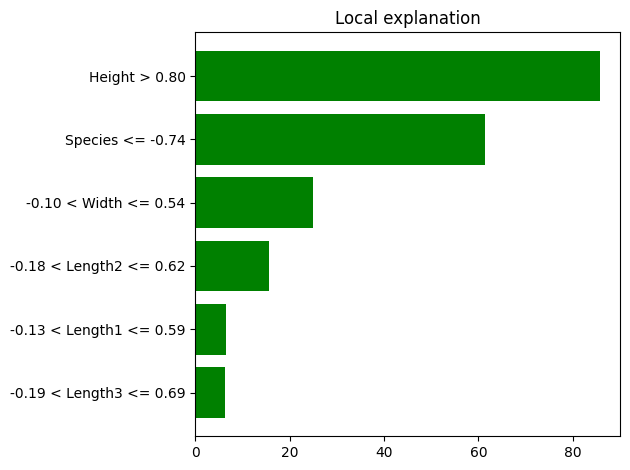

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
model1 = KerasRegressor(model=create_model,inp_s=6, epochs=20, optimizer='adam', loss='mean_absolute_error', batch_size=10)
model1.fit(x_train, y_train)
explainer = LimeTabularExplainer(x_train,feature_names=X.columns,class_names=['Weight'], mode='regression')
exp = explainer.explain_instance(x_test[25], model1.predict, num_features=6)
    #tab1.append(exp.local_exp)
exp.as_pyplot_figure()
plt.tight_layout()


Epoch 1/20
13/13 [==============================] - 1s 5ms/step - loss: 400.7478
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 395.1481
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 385.2611
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 365.8963
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 332.7515
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 274.2267
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 184.2076
Epoch 8/20
13/13 [==============================] - 0s 6ms/step - loss: 102.8859
Epoch 9/20
13/13 [==============================] - 0s 7ms/step - loss: 90.4006
Epoch 10/20
13/13 [==============================] - 0s 6ms/step - loss: 77.0026
Epoch 11/20
13/13 [==============================] - 0s 5ms/step - loss: 69.0263
Epoch 12/20
13/13 [==============================] - 0s 5ms/step - loss: 65.3170
Epoch 13/20
13/13 [==========

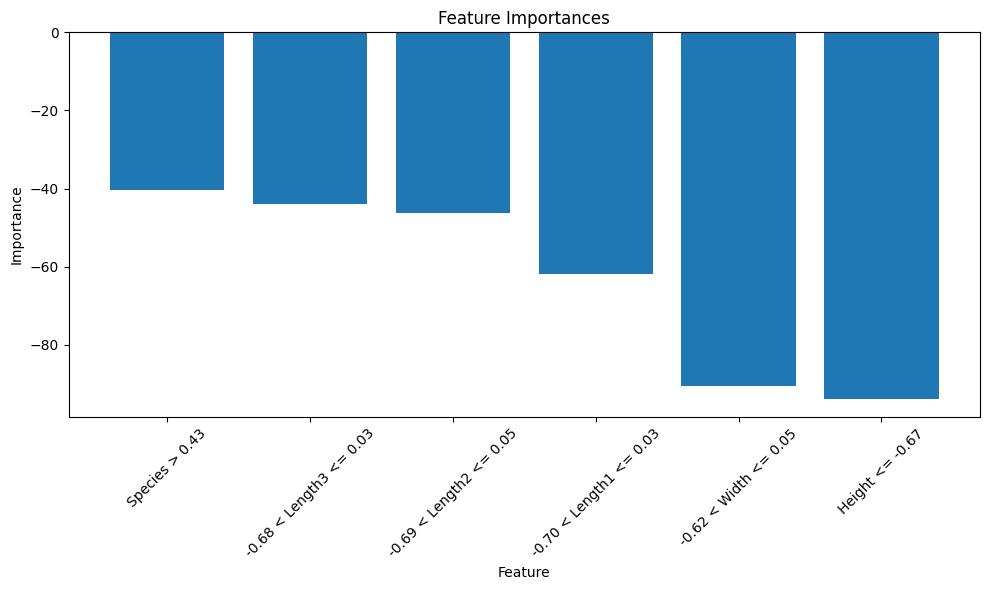

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
model1 = KerasRegressor(model=create_model,inp_s=6, epochs=20, optimizer='adam', loss='mean_absolute_error', batch_size=10)
# Define the LimeTabularExplainer
explainer = LimeTabularExplainer(x_train,feature_names=X.columns,class_names=['Weight'], mode='regression')


# Define the number of instances to explain, according our individual variant
num_instances = 9

# Define a list to store feature importances
lime_importances = []

# Perform feature importance calculation with different random states
for random_state in range(10):
    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(XS_scaler,Y, test_size=0.2, random_state=iteration+60)

    model1 = KerasRegressor(model=create_model,inp_s=6, epochs=20, optimizer='adam', loss='mean_absolute_error', batch_size=10)
    model1.fit(X_train, Y_train)

    # Select random instances for prediction and explanation
    instance_indices = np.random.randint(0, len(X_test), num_instances)

    # Calculate Lime importances for each instance
    instance_importances = []
    xx = pd.DataFrame(X_test)
    for instance_index in instance_indices:
        expl = explainer.explain_instance(xx.values[instance_index], model1.predict, num_features=len(xx.columns))
        importance = exp.as_list()
        instance_importances.append(importance)

    # Store the importances for the current random state
    lime_importances.append(instance_importances)

# Extract the numerical importances
numerical_importances = []
for instance_importances in lime_importances:
    instance_numerical_importances = [float(importance[1]) for importance in instance_importances[0]]
    numerical_importances.append(instance_numerical_importances)

# Average the Lime importances
average_importances = np.mean(numerical_importances, axis=0)

# Extract feature names
feature_names = [importance[0] for importance in lime_importances[0][0]]

# Create a table for the feature importances
importance_table = pd.DataFrame({'Feature': feature_names, 'Importance': average_importances})
importance_table = importance_table.sort_values(by='Importance', ascending=False)

# Create a bar plot for the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_table['Feature'], importance_table['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Task 4: “Evaluate how the features influence the target variable with Partial-
Dependence Plots (PDP) ” (10 scores)**

1) Construct a PDP for each feature in your dataset
(Use “from sklearn.inspection import PartialDependenceDisplay”). Discuss
how each of the variables influence the target variable.

In [ ]:
pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.0/570.0 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 3.5.4
    Uninstalling Sphinx-3.5.4:
      Successfully uninstalled Sphinx-3.5.4


13/13 [==============================] - 0s 1ms/step


[{'average': array([[395.49307, 372.77054, 353.69415, 338.39542, 328.9231 , 327.5538 ,
          332.31018]], dtype=float32),
  'values': [array([-1.33273018, -0.74410768, -0.15548519,  0.43313731,  1.0217598 ,
           1.6103823 ,  2.19900479])]},
 {'average': array([[234.53691, 240.8333 , 243.37141, 243.73785, 245.95917, 246.3337 ,
          248.2229 , 248.60428, 248.98672, 249.75502, 251.3052 , 252.87538,
          254.46461, 255.66931, 258.1092 , 263.12848, 266.14047, 268.3352 ,
          269.66785, 271.0121 , 272.824  , 274.19937, 275.5887 , 277.46796,
          278.41513, 279.36664, 281.28735, 281.771  , 283.23132, 285.2011 ,
          286.19464, 288.20178, 288.70773, 289.72443, 291.2628 , 291.77856,
          292.29617, 296.49445, 297.02676, 299.71335, 301.89294, 302.9921 ,
          304.65366, 305.21103, 306.8932 , 307.45758, 313.18625, 314.3495 ,
          315.51837, 316.69244, 318.46582, 320.85455, 322.0588 , 323.8773 ,
          324.48715, 330.04178, 333.81512, 334.44965, 

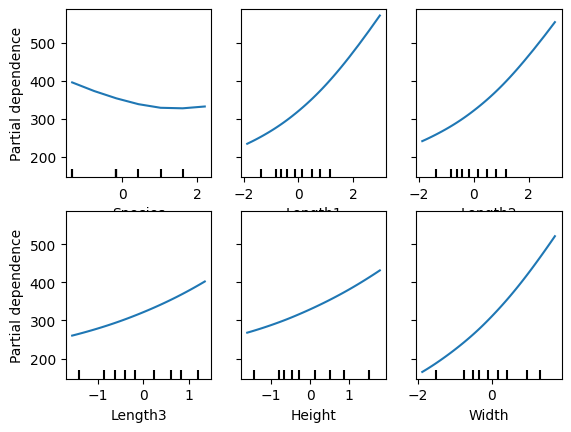

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
x_train_df = pd.DataFrame(x_train, columns =X.columns)
pdp_plot = PartialDependenceDisplay.from_estimator(model1, x_train_df, features=X.columns, feature_names =X.columns, kind='average', categorical_features=[False, False, False, False, False, False])

"""fig, axs =pdp_plot.plot()
for i, ax in enumerate(axs):
  ax[i].set_title(f'Partial Dependence Plot for {ax}')

plt.tight_layout()
plt.show()"""
pdp_plot.pd_results

our output show how the variables Length1, Length2, and width influences our target variables. we can see for the first both variables(length1, and length2) that more is the fish len(over 2), more it has a big weight(over 500). Even for a variable width.